we gonna use pca to apply logistic regression model inside a dataset that contains a large number of columns (independent variables)

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Wine.csv')

In [3]:
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
print('number of rows : ' + str(len(dataset)) + '\nnumber of columns : ' + str(len(dataset.columns)))

number of rows : 178
number of columns : 14


In [5]:
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

## PCA must be applied before fitting any model to our data

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
# Feature Scaling  ### must be applied in dimensionality reduction
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
X_train2 = X_train 
X_test2 = X_test

#### Apply PCA
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components = None)

###### so basically "n_components" is the number of extracted features you want to get. That will explain the most the variance and depending on what variance we would like to be explained we will choose the right number of principal components. But the problem now is that we know we want to get two principal components eventually to be able to visualise the training set results and the test results but we don't know how much variance these two components explain. So we need to check that. we need to make sure that the two first principal components that explain the most variance don't explain it to low variance and therefore we are not giving input to here. We are going to input none because then we will create a vector that we're going to call explains variance and we are going to see the cumulative variance explained by all the principal components.So we will see this will get more clear when we have a look at the vector.

In [11]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [12]:
explained_variance

array([0.36884109, 0.19318394, 0.10752862, 0.07421996, 0.06245904,
       0.04909   , 0.04117287, 0.02495984, 0.02308855, 0.01864124,
       0.01731766, 0.01252785, 0.00696933])

###### as we can see they are ranked from the first principal component that explains the most the variance down to the 12th and last principal component that explains the least the variance. So that means that if we include one principal component that will explain 37 percent of the variance, then if we take two principal components that will explain 37% plus 19% = 56% of the variance. And then if we take the top three principal components that will explain 67% of the variance and etc. So remember what we want to take are the first two principal components because we want to get two dimensions in the visualization of the training such result and therefore we need two independent variables that is the two principal components. And so we can see that if we take the two principal components here well they will explain 56% of the variance and that is pretty good.That is actually OK to make a classification more out of it.

In [13]:
pca2 = PCA(n_components = 2 )

In [14]:
X_train2 = pca2.fit_transform(X_train2)
X_test2 = pca2.transform(X_test2)
explained_variance = pca2.explained_variance_ratio_

In [15]:
X_train2[0:5]

array([[-2.17884511, -1.07218467],
       [-1.80819239,  1.57822344],
       [ 1.09829474,  2.22124345],
       [-2.55584748, -1.66210369],
       [ 1.85698063,  0.24157317]])

In [16]:
X_test2[0:5]

array([[ 2.20685211, -1.02850086],
       [-2.53651962, -1.83644227],
       [ 2.19183305,  1.81240519],
       [ 2.51489251, -1.38907803],
       [-0.34799131,  0.52539791]])

only two independent variables

### now we re ready to fit our classification model (logistic regression)

In [17]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train2, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
# Predicting the Test set results
y_pred = classifier.predict(X_test2)

In [19]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]], dtype=int64)

excellent result, as we can see in the 3x3 confusion matrix 14 correct predicted to be C1, 15 to be C2, 6 to be C3, with only one error

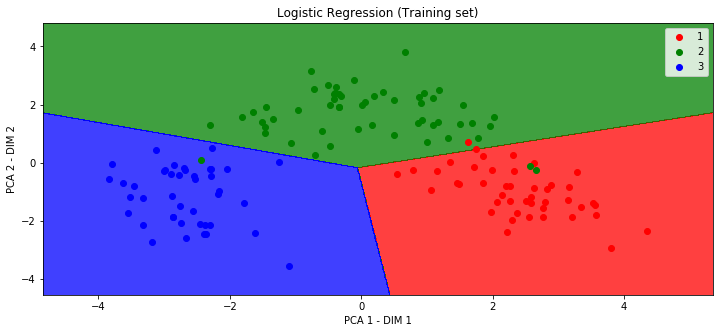

In [20]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train2, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize= (12,5))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PCA 1 - DIM 1')
plt.ylabel('PCA 2 - DIM 2')
plt.legend()
plt.show()

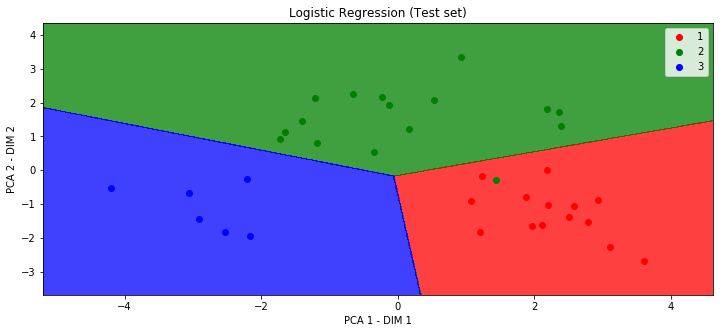

In [21]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test2, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize= (12,5))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PCA 1 - DIM 1')
plt.ylabel('PCA 2 - DIM 2')
plt.legend()
plt.show()